In [270]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import math
import torch
from torch import nn
import numpy as np
from torch.nn import functional as F

device = torch.device("cuda")

In [271]:
#隐藏层特征数量
hidden_size=20
#输入x的特征数量
input_size=1
output_size=1

In [272]:
data = pd.read_csv('data.csv')
data = np.array(data)
data = [[i[3]/1000] for i in data[4:]]
data = np.array(data)

data, data.shape

(array([[ 58.796],
        [ 60.266],
        [ 61.465],
        [ 62.828],
        [ 64.653],
        [ 65.994],
        [ 67.207],
        [ 66.207],
        [ 65.859],
        [ 67.296],
        [ 69.172],
        [ 70.499],
        [ 72.538],
        [ 74.542],
        [ 76.368],
        [ 78.534],
        [ 80.671],
        [ 82.992],
        [ 85.229],
        [ 87.177],
        [ 89.211],
        [ 90.859],
        [ 92.42 ],
        [ 93.717],
        [ 94.974],
        [ 96.259],
        [ 97.542],
        [ 98.705],
        [100.072],
        [101.654],
        [103.008],
        [104.357],
        [105.851],
        [107.507],
        [109.3  ],
        [111.026],
        [112.704],
        [114.333],
        [115.823],
        [117.171],
        [118.517],
        [119.85 ],
        [121.121],
        [122.389],
        [123.626],
        [124.761],
        [125.786],
        [126.743],
        [127.627],
        [128.453],
        [129.227],
        [129.988],
        [130

In [273]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.rnn = nn.RNN(
            input_size = input_size,#输入x的特征数量
            hidden_size = hidden_size,#隐藏层的特征数量
            num_layers=1,#RNN层数
            batch_first=True,#[batch_size, time_step, feature]
            nonlinearity='relu'
        )
        self.linear = nn.Linear(hidden_size,output_size)

    def forward(self,x,hidden_prev):
        out, hidden_prev = self.rnn(x,hidden_prev)
        out = out.view(-1,hidden_size)
        out = self.linear(out)
        out = out.unsqueeze(dim=0)
        return out,hidden_prev

In [274]:
print(data.shape)

(70, 1)


steps: 0 loss 12045.498046875
steps: 100 loss 1.1468298435211182
steps: 200 loss 0.7926117181777954
steps: 300 loss 0.7343810796737671
steps: 400 loss 0.3929401636123657
steps: 500 loss 0.33985787630081177
steps: 600 loss 0.24450261890888214
steps: 700 loss 0.28258565068244934
steps: 800 loss 0.2789369225502014
steps: 900 loss 0.2841865122318268
steps: 1000 loss 0.22537513077259064
steps: 1100 loss 0.14596760272979736
steps: 1200 loss 0.1368521898984909
steps: 1300 loss 0.2938595712184906
steps: 1400 loss 0.2944754660129547
steps: 1500 loss 0.27611929178237915
steps: 1600 loss 0.20872516930103302
steps: 1700 loss 0.27573835849761963
steps: 1800 loss 0.10081921517848969
steps: 1900 loss 0.2906341552734375
steps: 2000 loss 0.19495147466659546
steps: 2100 loss 0.2927630841732025
steps: 2200 loss 0.2860027551651001
steps: 2300 loss 0.30440035462379456
steps: 2400 loss 0.11570028215646744
steps: 2500 loss 0.23331376910209656
steps: 2600 loss 0.09342627227306366
steps: 2700 loss 0.0969830229

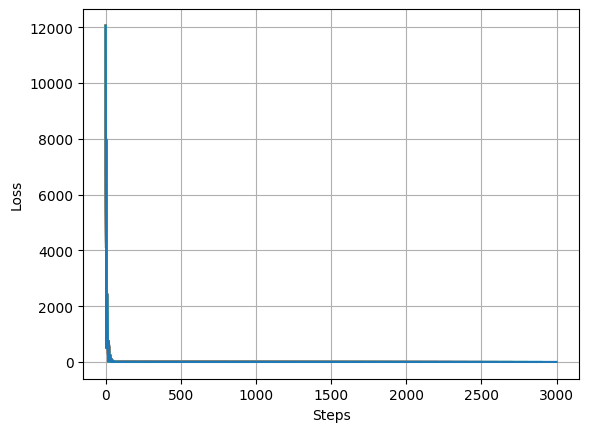

In [275]:
model = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=5e-2)
#初始化h0的值
hidden_prev = torch.zeros(1,1,hidden_size) # h0
loss_cnt = []
for iter in range(3001):

    start = np.random.randint(10)
    x = torch.tensor(data[start:-2]).float().view(1,70-start-2,1)
    y = torch.tensor(data[start+1:-1]).float().view(1,70-start-2,1)

    #训练模型
    output,hidden_prev = model(x,hidden_prev)
    hidden_prev = hidden_prev.detach()
    #计算损失函数
    model.zero_grad()
    loss = criterion(output,y)
    loss.backward()
    optimizer.step()
    loss_cnt.append(loss.item())
    #输出损失函数值
    if iter%100 == 0:
        plt.plot(loss_cnt)
        plt.grid()
        plt.xlabel('Steps')
        plt.ylabel('Loss')
        print('steps: {} loss {}'.format(iter,loss.item()))

In [276]:
x = torch.tensor(data[:]).float().view(1,-1,1)
input = x[:,0:68,:]

In [277]:
input[0][0].unsqueeze(dim=0)

tensor([[58.7960]])

In [278]:
#绘制预测图
hidden_prev = torch.zeros(1,hidden_size) # h0
predictions = []#预测值
for i in range(0,98):
    if i < 67:  # 预热
        (pred,hidden_prev) = model(input[0][i].unsqueeze(dim=0),hidden_prev)
        print(pred)
        predictions.append(pred.detach().numpy().ravel()[0])
    else :
        if i == 67:
            hidden_prev.unsqueeze_(dim=0)
        (pred,hidden_prev) = model(pred,hidden_prev)
        input = pred
        print(pred)
        predictions.append(pred.detach().numpy().ravel()[0])


tensor([[[61.5423]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[62.7633]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[63.3499]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[64.6952]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[66.5011]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[67.8197]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[69.0074]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[67.9895]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[67.6343]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[69.0818]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[70.9533]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[72.2564]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[74.2692]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[76.2492]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[78.0445]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[80.1807]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[82.2881]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[84.5761]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[86.7797]]], grad_fn=<UnsqueezeBackward0>)
tensor([[[88

[142960.92224121094, 143593.88732910156, 144216.9952392578, 144830.3680419922, 145434.18884277344, 146028.57971191406, 146613.6932373047, 147189.68200683594, 147756.69860839844, 148314.8651123047, 148864.3035888672, 149405.18188476562, 149937.60681152344, 150461.73095703125, 150977.69165039062, 151485.61096191406, 151985.595703125, 152477.76794433594, 152962.26501464844, 153439.22424316406, 153908.72192382812, 154370.8953857422, 154825.86669921875, 155273.7274169922, 155714.61486816406, 156148.62060546875, 156575.8514404297, 156996.4141845703, 157410.43090820312, 157817.97790527344]


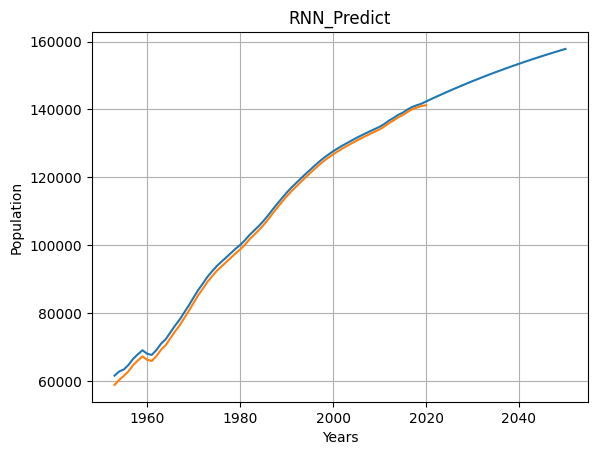

In [285]:
x_1 = range(1953,2051)
x_2 = range(1953,2021)
y_1 = predictions
y_2 = x[:,0:68,:].squeeze(dim=0).squeeze(dim=-1).tolist()

y_1 = [i *1000 for i in y_1]
y_2 = [i *1000 for i in y_2]
print(y_1[-30:])
plt.title("RNN_Predict")
plt.xlabel("Years")
plt.ylabel("Population")
plt.plot(x_1,y_1,x_2,y_2)
plt.grid()